In [2]:
from numpy import *
import operator
import matplotlib.pyplot as plt

In [ ]:
group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
labels = ['A', 'A', 'B', 'B']

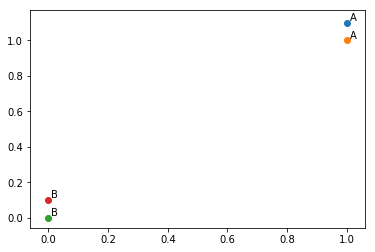

In [4]:
%matplotlib inline
for dot in group:
    plt.scatter(dot[0], dot[1])
for i in range(group.shape[0]):
    plt.annotate(labels[i], xy=group[i], xytext = (group[i][0] + 0.01, group[i][1] + 0.01))
plt.show()

In [5]:
def classify_0(in_x, data_set: ndarray, labels, k):
    data_set_size = data_set.shape[0]
    diff_mat = tile(in_x, (data_set_size, 1)) - data_set
    sqrt_diff_mat = diff_mat ** 2
    sqrt_distances = sqrt_diff_mat.sum(axis = 1)
    distance = sqrt_distances ** 0.5
    sorted_dist_indicies = distance.argsort()
    class_count = {}
    for i in range(k):
        vote_label = labels[sorted_dist_indicies[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    sorted_class_count = sorted(class_count.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_class_count[0][0]

In [6]:
classify_0([0, 0], group, labels, 3)

'B'

In [33]:
def file_to_matrix(filename):
    fr = open(filename)
    array_of_lines = fr.readlines()
    number_of_lines = len(array_of_lines)
    return_mat = zeros((number_of_lines, 3))
    class_label_vector = []
    for index, line in enumerate(array_of_lines):
        line = line.strip()
        list_from_line = line.split('\t')
        return_mat[index, :] = list_from_line[0: 3]
        class_label_vector.append(int(list_from_line[-1]))
    return return_mat, class_label_vector

def img_to_vector(filename):
    with open(filename) as fr:
        return_vector = zeros((1, 1024))
        for i in range(32):
            line = fr.readline()
            for j in range(32):
                return_vector[0, i * 32 + j] = int(line[j])
    return return_vector

In [13]:
dating_data_mat, dating_labels = file_to_matrix('D:/data/ch02/datingTestSet2.txt')

In [14]:
dating_data_mat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

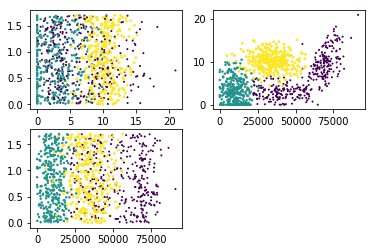

In [20]:
fig = plt.figure()
ax_1 = fig.add_subplot(221)
# ax.scatter(dating_data_mat[:, 1], dating_data_mat[:, 2])
ax_1.scatter(dating_data_mat[:, 1], dating_data_mat[:, 2], 1.0 * array(dating_labels), 15.0 * array(dating_labels))
ax_2 = fig.add_subplot(222)
ax_2.scatter(dating_data_mat[:, 0], dating_data_mat[:, 1], 1.0 * array(dating_labels), 15.0 * array(dating_labels))
ax_3 = fig.add_subplot(223)
ax_3.scatter(dating_data_mat[:, 0], dating_data_mat[:, 2], 1.0 * array(dating_labels), 15.0 * array(dating_labels))
plt.show()

In [24]:
# 归一化： new_value = (old_value - min) / (max - min)
def auto_norm(data_set: ndarray):
    min_value = data_set.min(0)
    max_value = data_set.max(0)
    ranges = max_value - min_value
    m = data_set.shape[0]
    norm_data_set = data_set - tile(min_value, (m, 1))
    norm_data_set = norm_data_set / tile(ranges, (m, 1))
    return norm_data_set, ranges, min_value

In [25]:
norm_mat, ranges, min_values = auto_norm(dating_data_mat)

In [26]:
norm_mat

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [28]:
def dating_class_test():
    ho_ratio = 0.1
    dating_data_mat, dating_labels = file_to_matrix('D:/data/ch02/datingTestSet2.txt')
    norm_mat, ranges, min_values = auto_norm(dating_data_mat)
    m = norm_mat.shape[0]
    num_test_vec = int(m * ho_ratio)
    error_count = 0.0
    for i in range(num_test_vec):
        classifier_result = classify_0(norm_mat[i, :], norm_mat[num_test_vec:m, :], dating_labels[num_test_vec: m], 3)
        print("the classifier came back with: " + str(classifier_result) + ", the real answer is: " + str(dating_labels[i]))
        if classifier_result != dating_labels[i]:
            error_count += 1.0
    print("the total error rate is: " + str(error_count / num_test_vec))
dating_class_test()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

In [29]:
def classifier_person():
    return_list = ['not at all', 'in small doses', 'in large doses']
    percent_tats = float(input("percentage of time spent playing video games?"))
    ff_miles = float(input("frequent flier miles earned per year?"))
    ice_cream = float(input("liters of ice cream consumed per year?"))
    dating_data_mat, dating_labels = file_to_matrix('D:/data/ch02/datingTestSet2.txt')
    norm_mat, ranges, min_values = auto_norm(dating_data_mat)
    in_arr = array([ff_miles, percent_tats, ice_cream])
    classifier_result = classify_0((in_arr - min_values) / ranges, norm_mat, dating_labels, 3)
    print("You will probably like this person:" + return_list[classifier_result])

In [30]:
classifier_person()

You will probably like this person:in large doses


In [34]:
img_to_vector('D:/data/ch02/digits/trainingDigits/0_0.txt')

array([[0., 0., 0., ..., 0., 0., 0.]])